<a href="https://colab.research.google.com/github/CaesarQuintero/MLProjectSupplyChain/blob/main/ML_Supply_Chain_Lynxus_Prototype_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Supply Chain Lynxus Project
## Overview
> This document, which is the jupyternotebook in a test environment, has all the statistical analysis of the case, including analysis of frequencies, patterns and possible solutions to the problem.

**Including ML Models: Numerical and categorical.**
* Numerical being how late a load arrives.
* Categorical being whether the load arrived late or not.

> **Author's Note:** It is worth mentioning that many tests were done on different problems with different statistical indicators to choose the best one.

**Developed by:** Cesar Augusto Quintero Guerra 2023

**Advised and reviewed by:** Johan Sanchez y Juan Lopez

**Lynxus 2023**


>Below you will find the project repository, along with all the development and planning of the project in notion including the production model.

* [Github Repository](https://github.com/CaesarQuintero/MLProjectSupplyChain)

* [Project in Notion](https://www.notion.so/Machine-Learning-Project-abc63e69e99643cb9eb3a51428deb061?pvs=4)

* [Production Model](https://colab.research.google.com/drive/14ulBobu4QZ5tPRMG2uqvU0nkn2i1uO8L?usp=sharing)

* [Linkedin](https://www.linkedin.com/in/caesarquintero/)


## Create Virtual Environment

In [ ]:
!pip3 install virtualenv
!python3 -m virtualenv env

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 15.5 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1158ms
  creator CPython3Posix(dest=/content/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


## Activate Virtual Environment

In [ ]:
!source env/bin/activate

## Install Depencies on the Virtual Environment

In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn seaborn google.colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


## Import of dependencies

In [ ]:
#Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
from google.colab import drive

#Sklearn
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Fine tunning Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Stats models
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import WLS
from scipy import stats
from math import sqrt

## Dataset source | File route

In [ ]:
#Drive mount
if not os.path.ismount('/content/drive'):
  drive.mount('/content/drive')

else:
 pass

#File variables
file_route = '/content/drive/MyDrive/Lynxus/'
file_name = "MLDATASET testing for model.csv"
os.chdir(file_route)

#### Check the route in cloud linux server

In [ ]:
!pwd

/content/drive/MyDrive/Lynxus


#### Check a correct mount of drive

In [ ]:
!head "MLDATASET testing for model.csv"

﻿carrierid,FreightWeight(lb),IsContract,Route length (miles),ModeType,freightType,TrailerType,CustomerID,Broker Rep,Customer Rep,BrokeredTime,Pickup Appointment End Time,Pickup Arrival Time,Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Arrival Time,Delivery Late Time (in Mins),Delivery Late Time (in Hours),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CarrierCharges,CustomerCharges,Late Delivery
40052,30000,TRUE,22.4,Truckload,Dry,Dry Van,10005,CERAZ,HOUSE,7/14/2021 10:07,44386.58333,44386.63819,79,44386.79167,44387.30417,738,12.3,Indianapolis,IN,46204,Fishers,IN,46040,0,0,TRUE
62847,30000,FALSE,579,Truckload,Dry,Dry Van,16158,DDRAV,,3/12/2021 14:46,44268.5,44268.41667,-120,44270,44270.33333,480,8,Fort Wayne,IN,46804,Maple Grove,MN,55369,2000,2400,TRUE
49004,186,FALSE,,LTL,Dry,Dry Van,16158,LATHAM,,1/7/2021 16:18,44019,44204,266400,44019,44204,266400,4440,Suwanee,GA,30024,Bethlehem,PA,18015,0,0,TRUE
38888,21600,FALSE,200,Power Only

##EDA

### Dataload

In [ ]:
# Pick Desired Columns for the model
desired_columns = ['FreightWeight(lb)','Route length (miles)','freightType','TrailerType','Broker Rep','BrokeredTime','Delivery Appointment End Time','BrokeredTime','Delivery Late Time (in Mins)','Pickup Late Time (in Mins)','OriginCity','OriginState','OriginZip','DestinationCity','DestinationState','DestinationZip','CustomerCharges']

In [ ]:
#Import dataset
data = pd.read_csv(file_name,usecols =desired_columns)

In [ ]:
data

,FreightWeight(lb),Route length (miles),freightType,TrailerType,Broker Rep,BrokeredTime,Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Late Time (in Mins),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CustomerCharges
0,30000,22.4,Dry,Dry Van,CERAZ,7/14/2021 10:07,79.0,44386.79167,738.0,Indianapolis,IN,46204,Fishers,IN,46040,0.00
1,30000,579.0,Dry,Dry Van,DDRAV,3/12/2021 14:46,-120.0,44270.00000,480.0,Fort Wayne,IN,46804,Maple Grove,MN,55369,2400.00
2,186,NaN,Dry,Dry Van,LATHAM,1/7/2021 16:18,266400.0,44019.00000,266400.0,Suwanee,GA,30024,Bethlehem,PA,18015,0.00
3,21600,200.0,Dry,Dry Van,RREES,1/14/2021 9:18,-599.0,44210.99931,-119.0,Indianapolis,IN,46214,Minooka,IL,60447,1050.00
4,30000,305.0,Dry,Dry Van,APEND,1/21/2021 15:03,-180.0,44221.58333,-240.0,Ajax,ON,L1S,Chateauguay,QC,J6J,800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180430,42000,110.0,Dry,Dry Van,BFERG,10/4/2023 10:23,-300.0,45204.66667,-480.0,Lima,OH,45804,Columbus,OH,43217,1116.80
180431,38804,188.0,Hazardous,Reefer,BFERG,10/5/2023 8:34,300.0,45204.00000,360.0,Greenville,OH,45331,Wyandotte,MI,48192,1875.00
180432,1500,0.0,Dry,Dry Van,TARMS,10/4/2023 12:10,-1818.0,45204.68750,-1827.0,Novi,MI,48377,Novi,MI,48376,200.00
180433,10000,328.1,Dry,Dry Van,SSIMO,10/4/2023 12:36,-40.0,45204.12500,-307.0,Bolingbrook,IL,60440,Springfield,OH,45502,1145.00


In [ ]:
#Difference between Mean and Median
pd.options.display.float_format = '{:.0f}'.format
print(f'Mean: \n\n{data.mean(numeric_only=True)}\n\n Median: \n\n{data.median(numeric_only=True)}n\n')

Mean: 

FreightWeight(lb)               26374
Route length (miles)              844
Pickup Late Time (in Mins)       -302
Delivery Appointment End Time   44677
Delivery Late Time (in Mins)      116
CustomerCharges                  1930
dtype: float64

 Median: 

FreightWeight(lb)               30000
Route length (miles)              484
Pickup Late Time (in Mins)        -40
Delivery Appointment End Time   44671
Delivery Late Time (in Mins)      -37
CustomerCharges                  1621
dtype: float64n



In [ ]:
# Data resume
#Includes, mean, std, min, max and data types
print(f'{data.describe()}\n\n{data.dtypes}n\n')

       FreightWeight(lb)  Route length (miles)  Pickup Late Time (in Mins)  \
count             180435                162012                      180039   
mean               26374                   844                        -302   
std                15099                 85434                       50708   
min                    0                     0                   -12702239   
25%                12723                   258                        -173   
50%                30000                   484                         -40   
75%                40000                   804                           0   
max               440000              34375777                      614640   

       Delivery Appointment End Time  Delivery Late Time (in Mins)  \
count                         180435                        180417   
mean                           44677                           116   
std                              311                         61269   
min              

### Checking Columns Dataset


In [ ]:
data.head()

,FreightWeight(lb),Route length (miles),freightType,TrailerType,Broker Rep,BrokeredTime,Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Late Time (in Mins),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CustomerCharges
0,30000,22,Dry,Dry Van,CERAZ,7/14/2021 10:07,79,44387,738,Indianapolis,IN,46204,Fishers,IN,46040,0
1,30000,579,Dry,Dry Van,DDRAV,3/12/2021 14:46,-120,44270,480,Fort Wayne,IN,46804,Maple Grove,MN,55369,2400
2,186,NaN,Dry,Dry Van,LATHAM,1/7/2021 16:18,266400,44019,266400,Suwanee,GA,30024,Bethlehem,PA,18015,0
3,21600,200,Dry,Dry Van,RREES,1/14/2021 9:18,-599,44211,-119,Indianapolis,IN,46214,Minooka,IL,60447,1050
4,30000,305,Dry,Dry Van,APEND,1/21/2021 15:03,-180,44222,-240,Ajax,ON,L1S,Chateauguay,QC,J6J,800


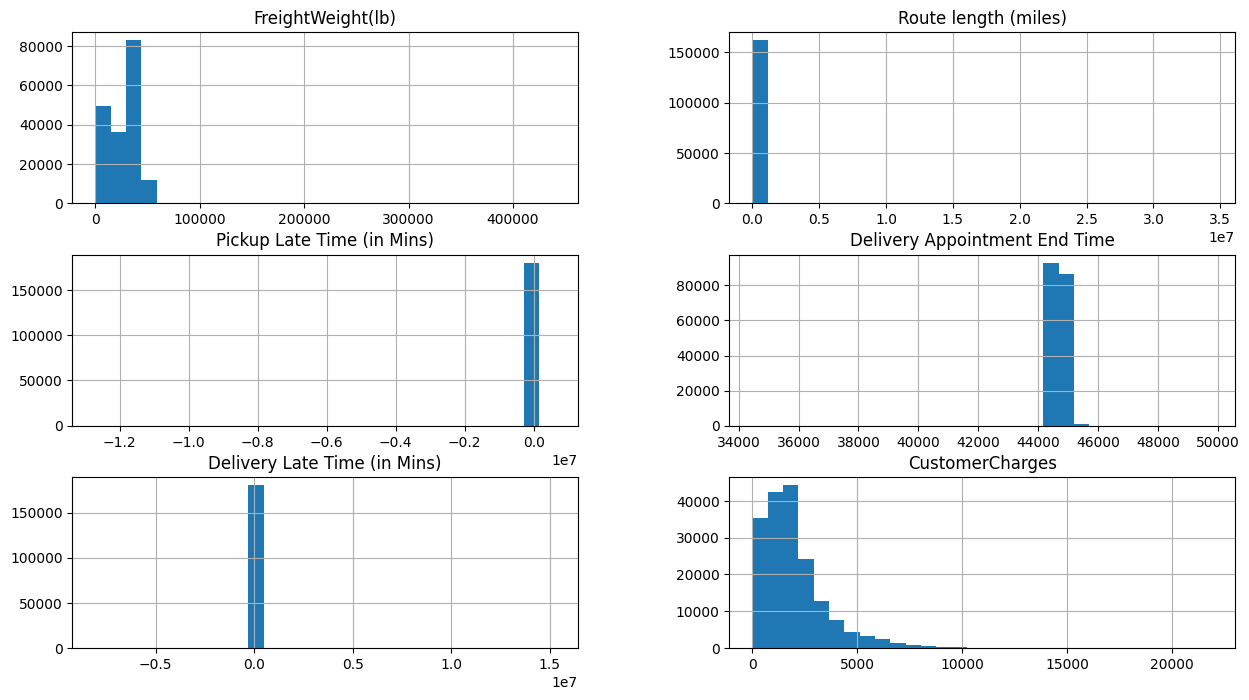

In [ ]:
# Variable Distribution and Histograms | Before Cleansing Process
data.hist(figsize=(15,8), bins = 30,)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180435 entries, 0 to 180434
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   FreightWeight(lb)              180435 non-null  int64  
 1   Route length (miles)           162012 non-null  float64
 2   freightType                    180435 non-null  object 
 3   TrailerType                    180435 non-null  object 
 4   Broker Rep                     180435 non-null  object 
 5   BrokeredTime                   180435 non-null  object 
 6   Pickup Late Time (in Mins)     180039 non-null  float64
 7   Delivery Appointment End Time  180435 non-null  float64
 8   Delivery Late Time (in Mins)   180417 non-null  float64
 9   OriginCity                     180435 non-null  object 
 10  OriginState                    180435 non-null  object 
 11  OriginZip                      180433 non-null  object 
 12  DestinationCity               

In [ ]:
data.tail()

,FreightWeight(lb),Route length (miles),freightType,TrailerType,Broker Rep,BrokeredTime,Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Late Time (in Mins),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CustomerCharges
180430,42000,110,Dry,Dry Van,BFERG,10/4/2023 10:23,-300,45205,-480,Lima,OH,45804,Columbus,OH,43217,1117
180431,38804,188,Hazardous,Reefer,BFERG,10/5/2023 8:34,300,45204,360,Greenville,OH,45331,Wyandotte,MI,48192,1875
180432,1500,0,Dry,Dry Van,TARMS,10/4/2023 12:10,-1818,45205,-1827,Novi,MI,48377,Novi,MI,48376,200
180433,10000,328,Dry,Dry Van,SSIMO,10/4/2023 12:36,-40,45204,-307,Bolingbrook,IL,60440,Springfield,OH,45502,1145
180434,10927,537,Dry,Dry Van,LMUNO,10/4/2023 14:32,0,45205,-537,Lakewood,WA,98499,Kalispell,MT,59901,3799


### Check for null and duplicates values

In [ ]:
#Null values
if data.isnull().values.any():
  print('The Dataset has null values')
else:
  print('The dataset has not null values')

The Dataset has null values


In [ ]:
#Duplicate Values
if data.duplicated().any():
   print('The Dataset has duplicate values')
else:
   print('The dataset has not duplicate values')

The Dataset has duplicate values


In [ ]:
# Porcentage of Duplicates values
pd.options.display.float_format = '{:.3f}%'.format
duplicated_values = round(data.duplicated().mean()*100,1)
print(f"The dataset has {duplicated_values}% duplicated values")

The dataset has 0.2% duplicated values


In [ ]:
# Porcentage of null values
pd.options.display.float_format = '{:.3f}%'.format
data.isna().mean()*100

FreightWeight(lb)                0.000%
Route length (miles)            10.210%
freightType                      0.000%
TrailerType                      0.000%
Broker Rep                       0.000%
BrokeredTime                     0.000%
Pickup Late Time (in Mins)       0.219%
Delivery Appointment End Time    0.000%
Delivery Late Time (in Mins)     0.010%
OriginCity                       0.000%
OriginState                      0.000%
OriginZip                        0.001%
DestinationCity                  0.000%
DestinationState                 0.000%
DestinationZip                   0.004%
CustomerCharges                  0.000%
dtype: float64

### Data Procesing (ETL) | Statistical Normalization

---



---



Aim for remove the null values and duplicates to increase the relationships in the correlation matrix before to setting up the Linear regression machine learning model

In [ ]:
#Columns category
columnslessthan1percentage = [ 'Delivery Late Time (in Mins)', 'OriginZip', 'DestinationZip','Pickup Late Time (in Mins)']
columnsgreaterthan1percentage = ['Route length (miles)']

#For columns with less than 1% of null values, delete null values.
data.dropna(subset=['Delivery Late Time (in Mins)'],inplace = True)
data.dropna(subset=['OriginZip'],inplace = True)
data.dropna(subset=['DestinationZip'],inplace = True)
data.dropna(subset=[],inplace = True)

#For columns with more than 1% of null values, fill null values with the average
data['Route length (miles)'].fillna(data['Route length (miles)'].median(),inplace = True)

#Removing duplicates
data.drop_duplicates(subset=None, keep="first", inplace=True)


In [ ]:
#Null values
if data.isnull().values.any():
  print('The Dataset has null values')
else:
  print('The dataset has not null values')

The Dataset has null values


In [ ]:
# Porcentage of null values
data.isna().mean()*100

FreightWeight(lb)               0.000%
Route length (miles)            0.000%
freightType                     0.000%
TrailerType                     0.000%
Broker Rep                      0.000%
BrokeredTime                    0.000%
Pickup Late Time (in Mins)      0.220%
Delivery Appointment End Time   0.000%
Delivery Late Time (in Mins)    0.000%
OriginCity                      0.000%
OriginState                     0.000%
OriginZip                       0.000%
DestinationCity                 0.000%
DestinationState                0.000%
DestinationZip                  0.000%
CustomerCharges                 0.000%
dtype: float64

In [ ]:
#Duplicate Values
if data.duplicated().any():
   print('The Dataset has duplicate values')
else:
  print('The dataset has not duplicate values')

The dataset has not duplicate values


In [ ]:
# Porcentage of Duplicates values
pd.options.display.float_format = '{:.3f}%'.format
duplicated_values = round(data.duplicated().mean()*100,1)
print(f"{duplicated_values}%")

0.0%


### Checking and removing Outliers

<Axes: >

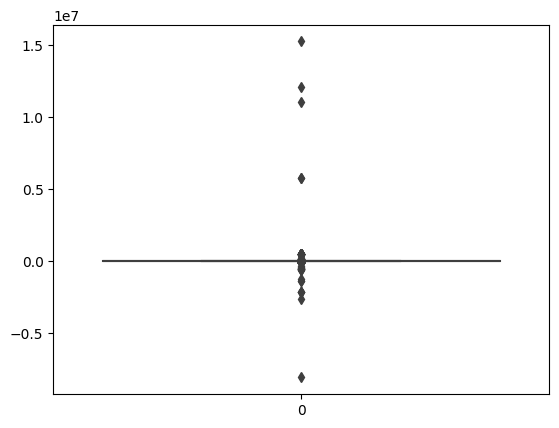

In [ ]:
sns.boxplot(data['Delivery Late Time (in Mins)'])

In [ ]:
#Picking integer columns
data = data.select_dtypes(include=["int64", "float64"])
# Filter values outside the range
desired_range = (-45000, 45000)
data = data[data["Delivery Late Time (in Mins)"].between(*desired_range)]

In [ ]:
# Atipical Values | Outliers
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print("Outliers in the variable :", col, len(outliers))

Outliers in the variable : FreightWeight(lb) 15
Outliers in the variable : Route length (miles) 13036
Outliers in the variable : Pickup Late Time (in Mins) 17541
Outliers in the variable : Delivery Appointment End Time 0
Outliers in the variable : Delivery Late Time (in Mins) 22697
Outliers in the variable : CustomerCharges 9961


In [ ]:
#Outliers Remover
data = data.drop(outliers.index)

In [ ]:
# Atipical Values checker | Outliers
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print("Outliers in the variable :", col, len(outliers))

Outliers in the variable : FreightWeight(lb) 15
Outliers in the variable : Route length (miles) 8119
Outliers in the variable : Pickup Late Time (in Mins) 19001
Outliers in the variable : Delivery Appointment End Time 0
Outliers in the variable : Delivery Late Time (in Mins) 21004
Outliers in the variable : CustomerCharges 2658


<Axes: >

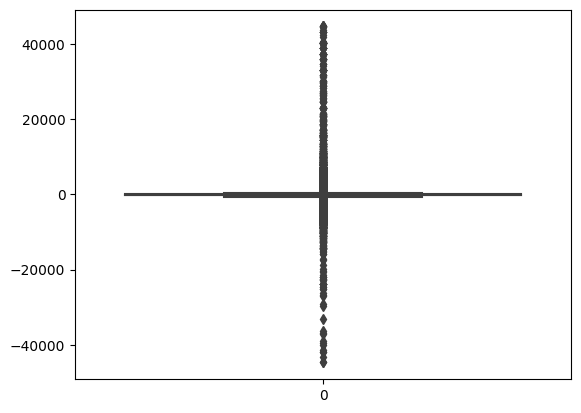

In [ ]:
sns.boxplot(data['Delivery Late Time (in Mins)'])

### Variable Distribution and Correlation matrix | After Data Cleansing

In [ ]:
#Difference between Mean and Median
pd.options.display.float_format = '{:.0f}'.format
print(f'Mean: \n\n{data.mean(numeric_only=True)}\n\n Median: \n\n{data.median(numeric_only=True)}n\n')

Mean: 

FreightWeight(lb)               26265
Route length (miles)              748
Pickup Late Time (in Mins)       -333
Delivery Appointment End Time   44682
Delivery Late Time (in Mins)     -150
CustomerCharges                  1664
dtype: float64

 Median: 

FreightWeight(lb)               30000
Route length (miles)              484
Pickup Late Time (in Mins)        -40
Delivery Appointment End Time   44682
Delivery Late Time (in Mins)      -37
CustomerCharges                  1550
dtype: float64n



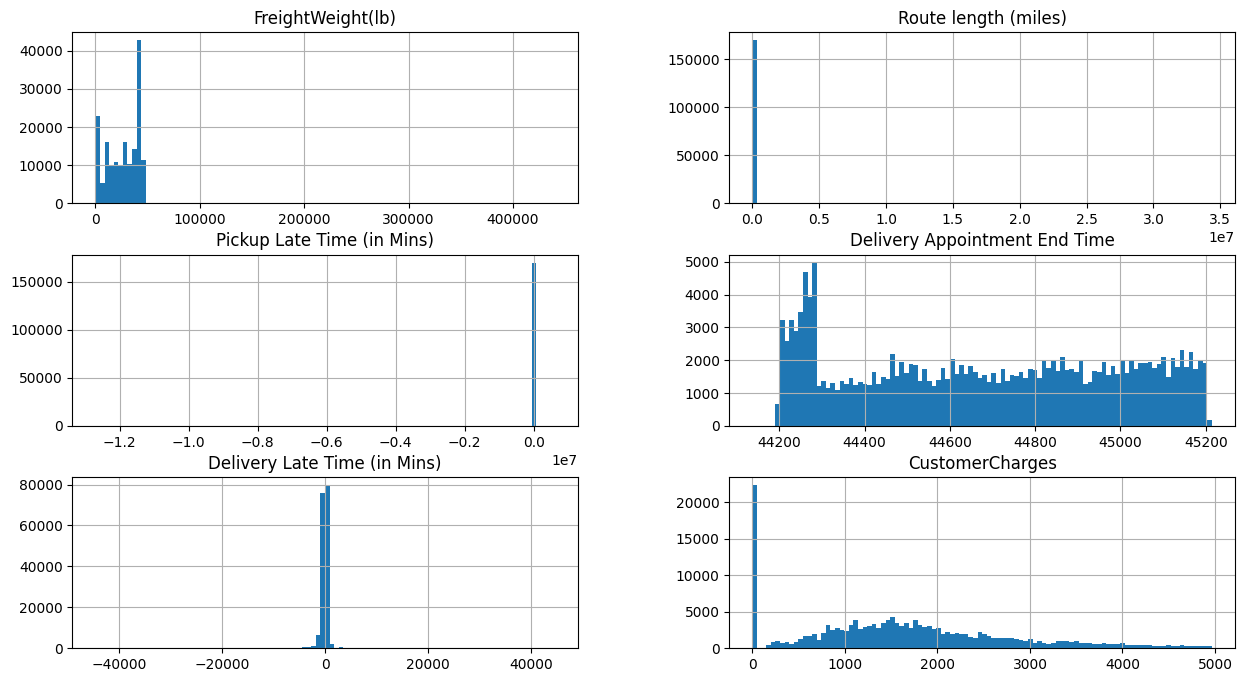

In [ ]:
# Variable distribution
data.hist(figsize=(15,8), bins = 100)
plt.show()

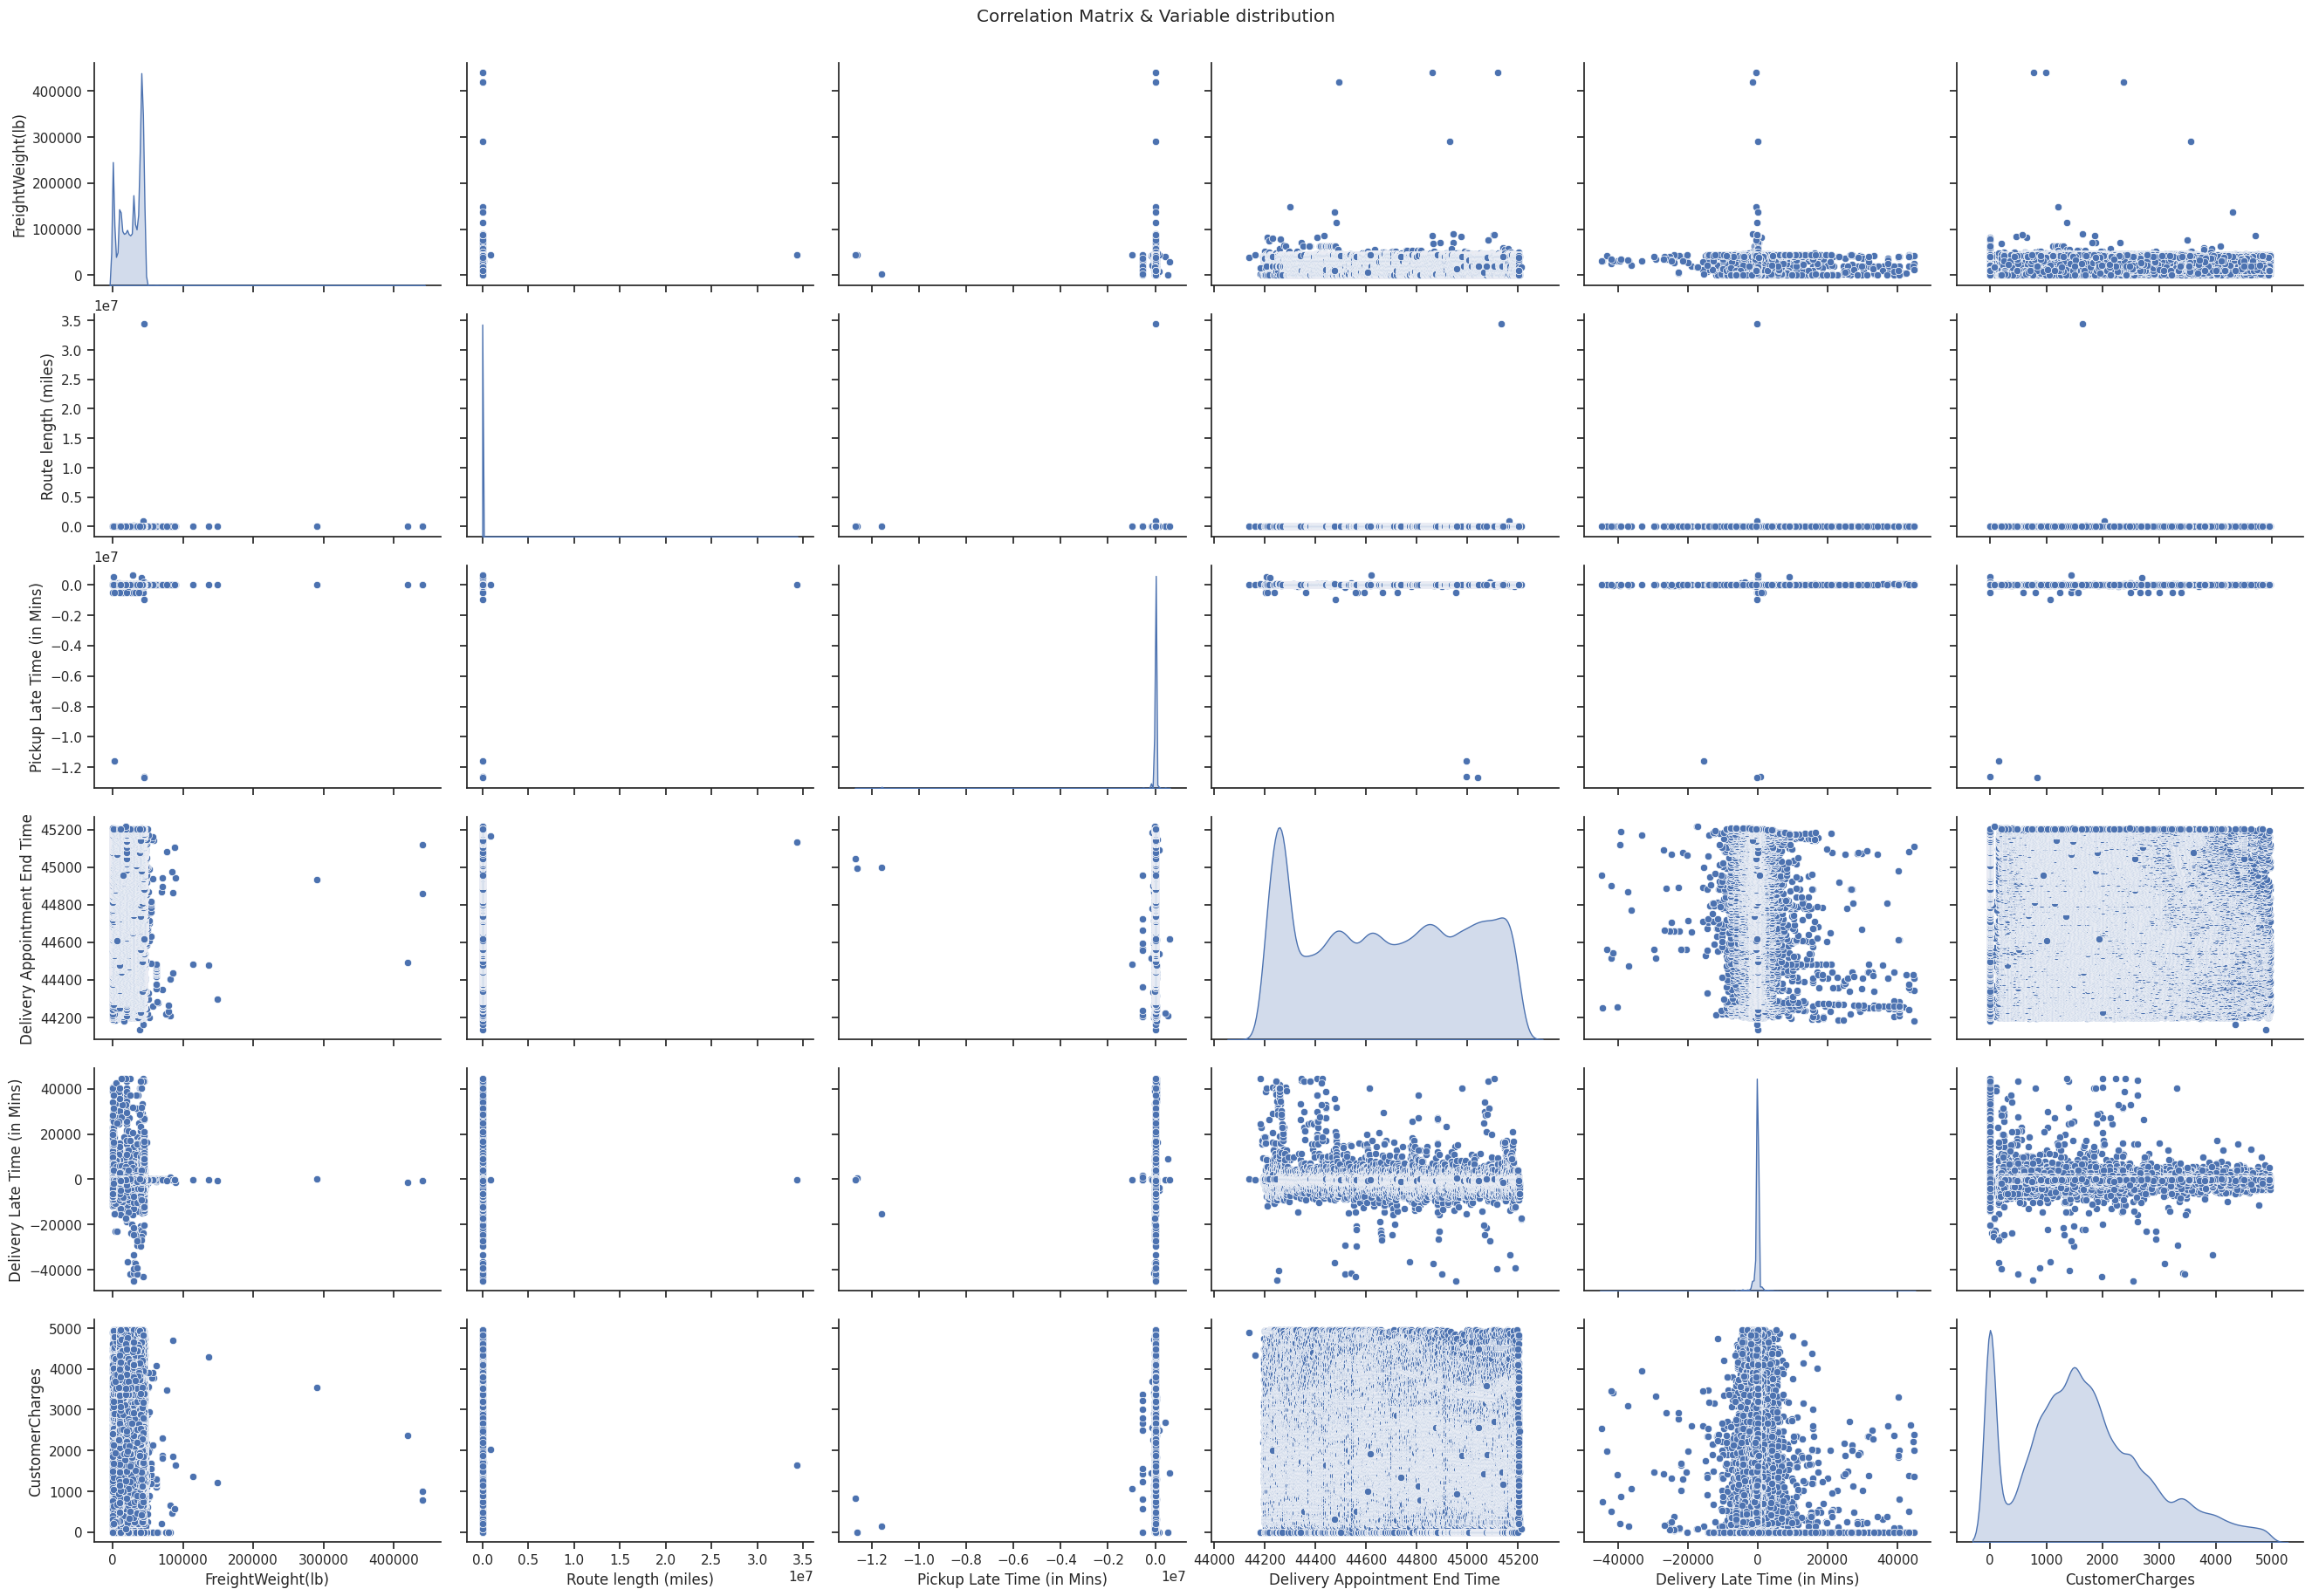

In [ ]:
sns.set(style='ticks')
sns.pairplot(data, diag_kind='kde', markers='o', height=3, aspect=1.5, dropna=True)
plt.suptitle('Correlation Matrix & Variable distribution', y=1.02)
plt.show()

## Multicollinearity test

The Multicollinearity test correlates different variables and looks for correlation between the variables.

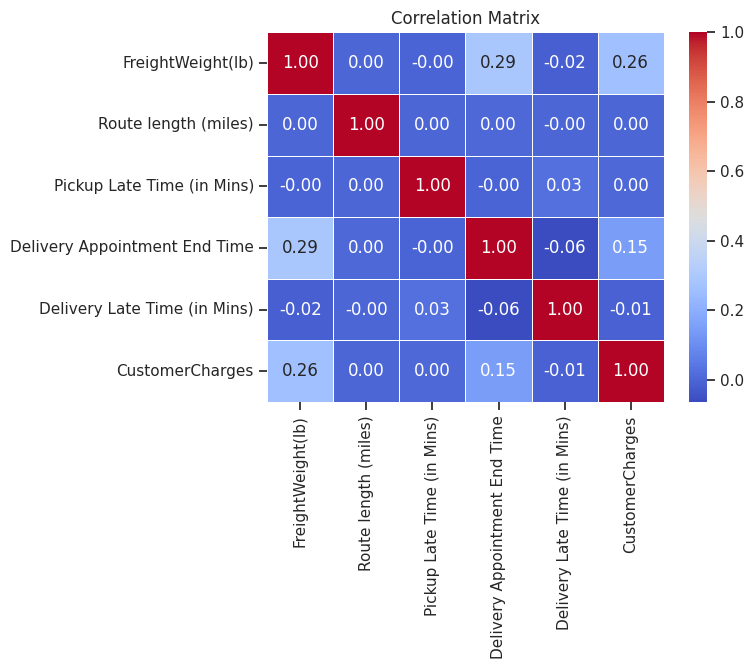

In [ ]:
# Variable correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Linear Regression Models

### Linear models

Using the library for ML Scikit-learn, will be train and defines the model

In [ ]:
# Do not touch, Experimental
#  Encode the categorical columns, This code produce CRASH
#encoded_df = pd.get_dummies(data, columns=['freightType', 'TrailerType', 'Broker Rep', 'OriginCity', 'OriginState', 'OriginZip', 'DestinationCity', 'DestinationState', 'DestinationZip'])

#### Define X and Y

In [ ]:
# Define the target variable
y = data["Delivery Late Time (in Mins)"]

# Select the numerical columns
x = data[["FreightWeight(lb)", "Route length (miles)","Delivery Appointment End Time","CustomerCharges"]]


#### Split the train Data from the dataset

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.20)

#### Model Creation and Training

In [ ]:
# Create the linear regression model
l_model = LinearRegression()

In [ ]:
# Train the model
l_model.fit(x_train, y_train)

LinearRegression()

#### Model Rating: Model Score, R2 score, MSE, RMSE

In [ ]:
#Model score
l_model.score(x_train, y_train)

0.0038830919469640124

In [ ]:
#Changing format
pd.options.display.float_format = '{:.3f}'.format

# Calculate the R2 score
r2 = r2_score(y_test, l_model.predict(x_test))
# Calculate the MSE
mse = mean_squared_error(y_test, l_model.predict(x_test))
#Calculate RMSE
rms = sqrt(mean_squared_error(y_test, l_model.predict(x_test)))

# Print the R2 score
print(" Linear model | R2 = ", r2)
# Print the MSE
print("MSE = ", mse)
print('RMSE = ',rms)

#R2 Score, MSE (Mean Squared Error) ,  RMSE (Root Mean Squared Error)

 Linear model | R2 =  0.004590442344889478
MSE =  1613620.8810274082
RMSE =  1270.2837797230225


#### Model Coefficients

In [ ]:

l_model.coef_

array([ 2.54313602e-04,  8.39103210e-07, -2.83826680e-01, -7.75222700e-03])

#### Model Prediction

In [ ]:
y_pred = l_model.predict(x_test)

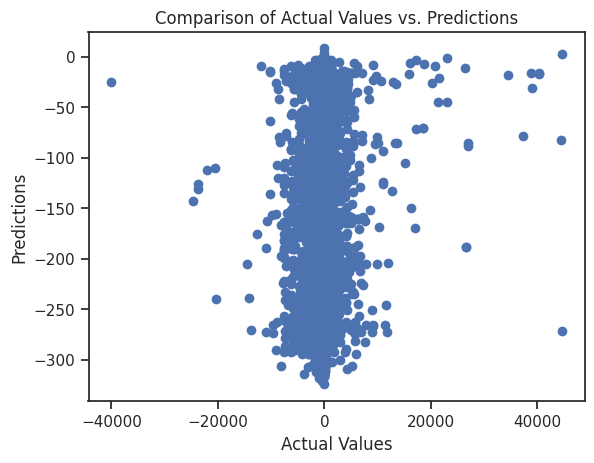

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Comparison of Actual Values vs. Predictions")
plt.show()



A scatter plot that shows how real values and predictions compare. If the model is accurate, the points on the plot should form a diagonal line. If the points deviate significantly from this line, it could indicate poor model performance.

## OLS Model
Ordinary least squares



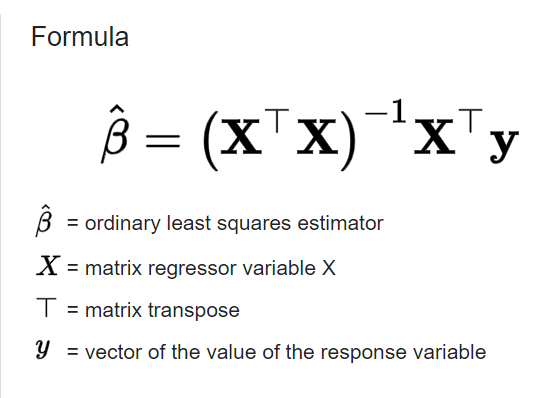

Using the OLS library we will try make other linear regression

In [ ]:
#Adding contant x for linear regression using OLS
x = sm.add_constant(x)

In [ ]:
ols_model = sm.OLS(y, x).fit()

In [ ]:
ols_model_r_squared = ols_model.rsquared
print(' OLS Model | R2 = ',ols_model_r_squared)

 OLS Model | R2 =  0.004008008284858922


#### Model results: P values, multicollinearity, Kurtosis

In [ ]:
results = ols_model.summary()
print(results)

                                 OLS Regression Results                                 
Dep. Variable:     Delivery Late Time (in Mins)   R-squared:                       0.004
Model:                                      OLS   Adj. R-squared:                  0.004
Method:                           Least Squares   F-statistic:                     170.9
Date:                          Mon, 08 Jan 2024   Prob (F-statistic):          2.47e-146
Time:                                  21:03:20   Log-Likelihood:            -1.4711e+06
No. Observations:                        169877   AIC:                         2.942e+06
Df Residuals:                            169872   BIC:                         2.942e+06
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------

These results show the p-values, where FreightWeight(lb) and Delivery Appointment end time are significant.

## Heteroscedasticity test

In [ ]:
bp_test = het_breuschpagan(ols_model.resid, x)

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
print("Breusch-Pagan test p-value:", bp_test[1])

Breusch-Pagan test p-value: 7.86522932555274e-46


A small p-value in the Breusch-Pagan test suggests heteroscedasticity in the errors.Heteroscedasticity refers to inhomogeneity in the variance of the model errors.

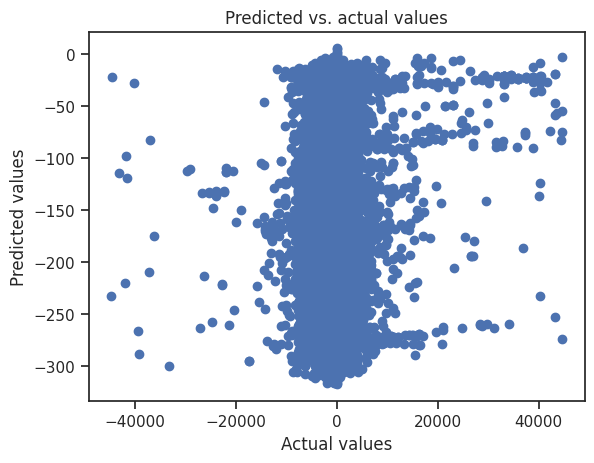

In [ ]:
# Plot the predicted values against the actual values
plt.scatter(y, ols_model.predict(x))
plt.title("Predicted vs. actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [ ]:
#Saving for other Model
# Create a confusion matrix
#confusion_matrix = confusion_matrix(y_test, model.predict(x_test))
#This is for clustering

In [ ]:
# Print the confusion matrix
#print("Confusion matrix:\n", confusion_matrix)

## Lasso Model

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(x_train,y_train)

Lasso()

In [ ]:
lasso_model_r2 = lasso_model.score(x_test,y_test)

In [ ]:
print('Lasso Model | R2 = ', lasso_model_r2)

Lasso Model | R2 =  0.004590456662983189


## W.S.L (Weighted least squares)

In [ ]:
#Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_trest =scaler.transform(x_test)

In [ ]:
#Caculate weights
weights = 1 / (y_train**2)

In [ ]:
WLS_model = WLS(y_train, x_train, weights = weights)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:772: RuntimeWarning: invalid value encountered in multiply
  return x * np.sqrt(self.weights)


In [ ]:
#WLS_model.fit()


## Dataset Transformation and analysis for classification models

In [ ]:
data

,FreightWeight(lb),Route length (miles),Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Late Time (in Mins),CustomerCharges
0,30000,22.400,79.000,44386.792,738.000,0.000
1,30000,579.000,-120.000,44270.000,480.000,2400.000
3,21600,200.000,-599.000,44210.999,-119.000,1050.000
4,30000,305.000,-180.000,44221.583,-240.000,800.000
5,1118,548.000,-420.000,44251.375,0.000,0.000
...,...,...,...,...,...,...
180430,42000,110.000,-300.000,45204.667,-480.000,1116.800
180431,38804,188.000,300.000,45204.000,360.000,1875.000
180432,1500,0.000,-1818.000,45204.688,-1827.000,200.000
180433,10000,328.100,-40.000,45204.125,-307.000,1145.000


In [ ]:
# Create a new column pickup late
data['Pickup late(Y/N)'] = np.where(data['Pickup Late Time (in Mins)'] > 0, 1, 0)

In [ ]:
# Create a new column Deliver late
data['Deliver late(Y/N)'] = np.where(data['Delivery Late Time (in Mins)'] > 0, 1, 0)

In [ ]:
data

,FreightWeight(lb),Route length (miles),Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Late Time (in Mins),CustomerCharges,Pickup late(Y/N),Deliver late(Y/N)
0,30000,22.400,79.000,44386.792,738.000,0.000,1,1
1,30000,579.000,-120.000,44270.000,480.000,2400.000,0,1
3,21600,200.000,-599.000,44210.999,-119.000,1050.000,0,0
4,30000,305.000,-180.000,44221.583,-240.000,800.000,0,0
5,1118,548.000,-420.000,44251.375,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...
180430,42000,110.000,-300.000,45204.667,-480.000,1116.800,0,0
180431,38804,188.000,300.000,45204.000,360.000,1875.000,1,1
180432,1500,0.000,-1818.000,45204.688,-1827.000,200.000,0,0
180433,10000,328.100,-40.000,45204.125,-307.000,1145.000,0,0


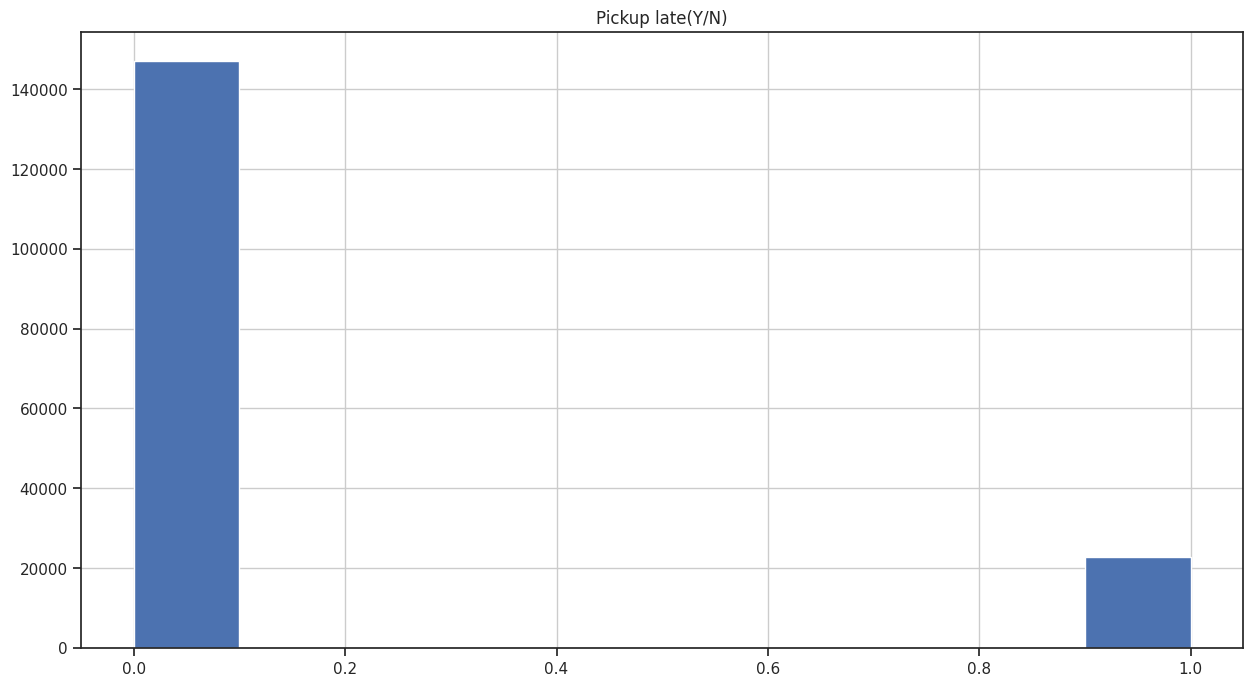

In [ ]:
# Variable distribution pickup late
data.hist(column='Pickup late(Y/N)' , figsize=(15,8), bins = 10)
plt.show()

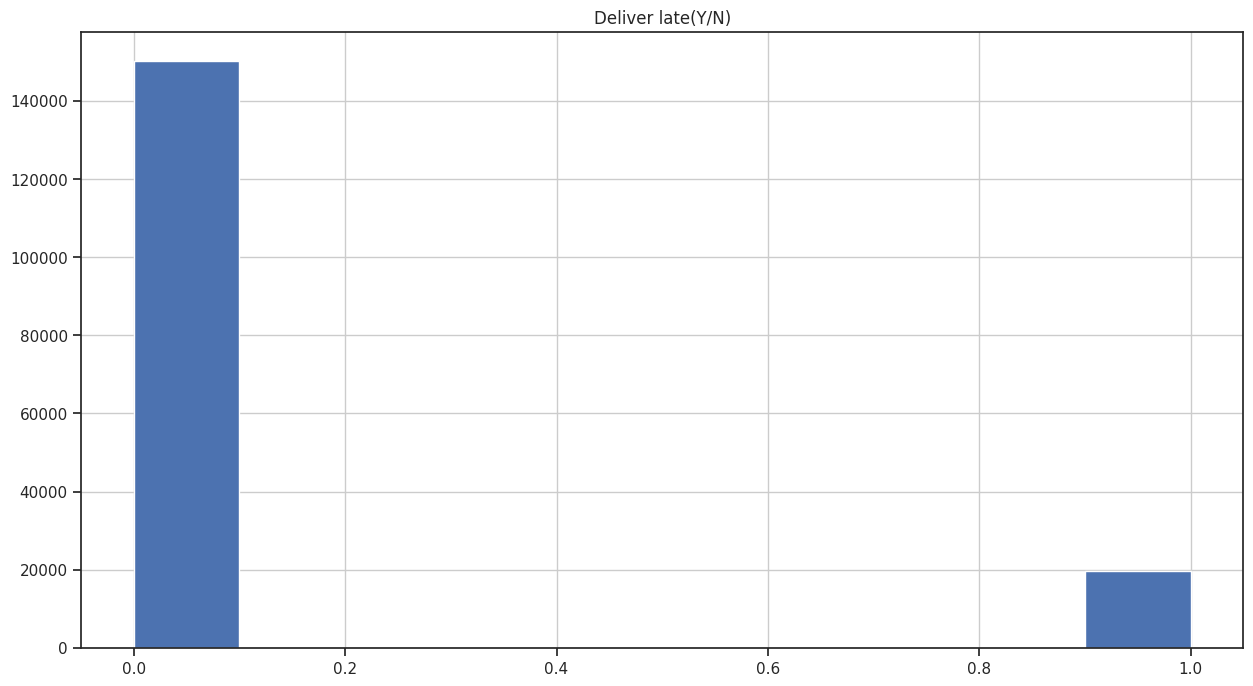

In [ ]:
# Variable distribution Deliver late
data.hist(column='Deliver late(Y/N)', figsize=(15,8), bins = 10)
plt.show()

In [ ]:
# Define 0 and 1 value_counts for deliver late
d_0 = data['Deliver late(Y/N)'].value_counts()[0]
d_1 = data['Deliver late(Y/N)'].value_counts()[1]
d_0percentage = round (((d_0/(d_0 + d_1))*100),2)
d_1percentage = round (((d_1/(d_0 + d_1))*100),2)

# print 0  and 1 values
print(f" {d_0} delivers were not late, this equally to the {d_0percentage} % ")
print(f" {d_1} delivers were late, this equally to the {d_1percentage} %")



 150173 delivers were not late, this equally to the 88.4 % 
 19704 delivers were late, this equally to the 11.6 %


In [ ]:
# Define 0 and 1 value_counts for pickup late
p_0 = data['Pickup late(Y/N)'].value_counts()[0]
p_1 = data['Pickup late(Y/N)'].value_counts()[1]
p_0percentage = round (((p_0/(p_0 + p_1))*100),2)
p_1percentage = round (((p_1/(p_0 + p_1))*100),2)

# print 0  and 1 values
print(f" {p_0} pick ups were not late, this equally to the {p_0percentage} % ")
print(f" {p_1} pick upss were late, this equally to the {p_1percentage} %")


 147059 pick ups were not late, this equally to the 86.57 % 
 22818 pick upss were late, this equally to the 13.43 %


In [ ]:
# difference between pickup and delivery late
dfc = round(abs(p_0percentage-d_0percentage),2)
print (f'Difference = {dfc} % ')
#Notes: Ver posibles differences razones de pickup late and delivery late , ver fenomenos, ver razones que expliquen este fenomeno
# Revisar outlier altos (irreales)

Difference = 1.83 % 


In [ ]:
# Statistics of Pickup and Delivery late time
data[['Pickup Late Time (in Mins)','Delivery Late Time (in Mins)']].describe()

,Pickup Late Time (in Mins),Delivery Late Time (in Mins)
count,169485.000,169877.000
mean,-332.928,-150.492
std,52141.395,1397.695
min,-12702239.000,-44700.000
25%,-165.000,-240.000
50%,-40.000,-37.000
75%,0.000,0.000
max,614640.000,44640.000


In [ ]:
#Mean of 1/0 cases on delivery

mean_on_time_delivery = data['Delivery Late Time (in Mins)'].where(data['Delivery Late Time (in Mins)'] <= 0).mean()
mean_late_delivery = data['Delivery Late Time (in Mins)'].where(data['Delivery Late Time (in Mins)'] > 0).mean()

print(f'Delivery On Time Mean: {mean_on_time_delivery} mins')
print(f'Delivery Late Time Mean: {mean_late_delivery} mins')

Delivery On Time Mean: -285.86686022121154 mins
Delivery Late Time Mean: 881.262484774665 mins


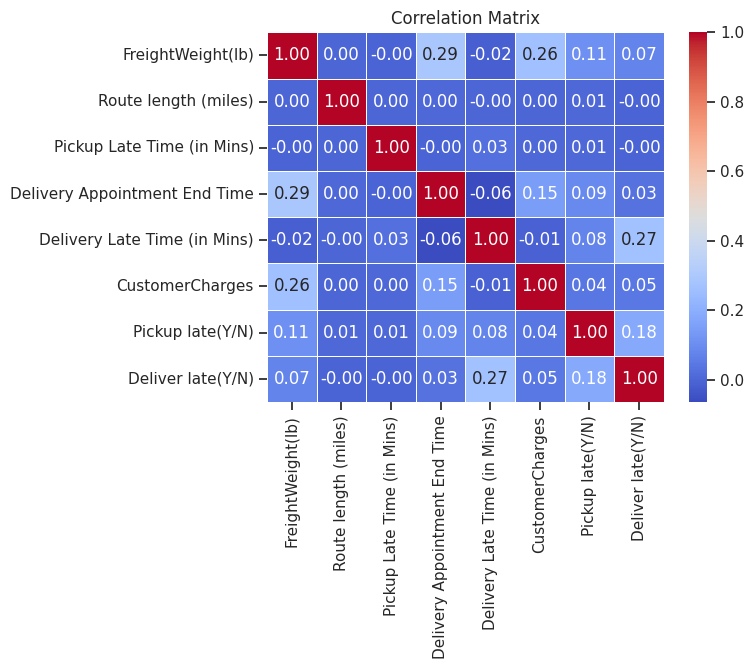

In [ ]:
# Variable correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Classification models

#### Define X and Y

In [ ]:
# Define the target variable
y = data['Deliver late(Y/N)']

# Select the numerical columns
x = data[["FreightWeight(lb)", "Route length (miles)","CustomerCharges"]]


#Revisar alternativas con carrier charges en vez de customer charges

#### Split the train Data from the dataset

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## Logistic Regression | Logit

#### Model Creation and Training

In [ ]:
# Create the logic probit model
logit_model = LogisticRegression(solver='lbfgs')

In [ ]:
# Train the model
logit_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logit_predictions = logit_model.predict(x_test)

In [ ]:
print('Logit model:')
print(classification_report(y_test, logit_predictions))
print('Accuracy:', accuracy_score(y_test, logit_predictions))
# Revisar documentos estilo stats models

Logit model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     30099
           1       0.00      0.00      0.00      3877

    accuracy                           0.89     33976
   macro avg       0.44      0.50      0.47     33976
weighted avg       0.78      0.89      0.83     33976

Accuracy: 0.8858900400282552


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [ ]:
# Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(x_train, y_train)
random_forest_predictions = random_forest_model.predict(x_test)

In [ ]:
print('\nRandom Forest classifier:')
print(classification_report(y_test, random_forest_predictions))
print('Accuracy:', accuracy_score(y_test, random_forest_predictions))


Random Forest classifier:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     30099
           1       0.27      0.07      0.11      3877

    accuracy                           0.87     33976
   macro avg       0.58      0.52      0.52     33976
weighted avg       0.82      0.87      0.84     33976

Accuracy: 0.8727631269131152


## Probit

In [ ]:
probit=sm.Probit(y_train,x_train)

In [ ]:
probit.fit()
print(probit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.422612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.422612
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:      Deliver late(Y/N)   No. Observations:               135901
Model:                         Probit   Df Residuals:                   135898
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Jan 2024   Pseudo R-squ.:                 -0.1745
Time:                        21:03:59   Log-Likelihood:                -57433.
converged:                       True   LL-Null:                       -48899.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
#probit_predictions =probit.predict(x_test)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
#print(y_test)

In [ ]:
#(y_pred)

## Oversample the minority class using SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='minority',random_state=123)
x_train_late, y_train_late = sm.fit_resample(x_train, y_train)

## Undersample the majority class using SMOTE

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority')
x_train_ontime, y_train_ontime = rus.fit_resample(x_train, y_train)

## New Balanced Data

In [ ]:
# Combine the oversampled late delivery data and undersampled on-time delivery data
x_train_smote = pd.concat([x_train_late, x_train_ontime])
y_train_smote = pd.concat([y_train_late, y_train_ontime])

## Random Forest Classifier with SMOTE

In [ ]:
random_forest_model_SMOTE = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest_model_SMOTE.fit(x_train_smote, y_train_smote)

In [ ]:

random_forest_predictions_SMOTE = random_forest_model_SMOTE.predict(x_test)

In [ ]:
print('\nRandom Forest classifier:')
print(classification_report(y_test, random_forest_predictions_SMOTE))
print('Accuracy:', accuracy_score(y_test, random_forest_predictions_SMOTE))

## Fine tunning random forest


In rappi they use random forest to find fraud detection

![title](https://miro.medium.com/v2/resize:fit:592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

In [ ]:
# Define hyperparameters to tune
hyperparameters = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": np.arange(1, 5, 1),
}


In [ ]:
# Create a grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyperparameters, cv=5)

In [ ]:
# Fit grid search to the data
grid_search.fit(x_train, y_train)

In [ ]:
# Print the best parameters
print(grid_search.best_params_)

## Random forest Classifier with hyperparameters without SMOTE Oversampling

In [ ]:
#Using the finetuned model
hyperparameters = {
    "n_estimators": 60,
    "max_depth": 4,
}

In [ ]:
# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(**hyperparameters)

In [ ]:
# Fit the model
random_forest_model.fit(x_train, y_train)

In [ ]:
# Make predictions
predictions = random_forest_model.predict(x_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

## Random forest Classifier with hyperparameters with SMOTE Oversampling and Unsampling
**Definitive**

In [ ]:
#Using the finetuned model
hyperparameters = {
    "n_estimators": 60,
    "max_depth": 4,
}

In [ ]:
# Create a Random Forest classifier
random_forest_model_SMOTE = RandomForestClassifier(**hyperparameters)

In [ ]:
# Fit the model
random_forest_model_SMOTE.fit(x_train_smote, y_train_smote)

In [ ]:
# Make predictions
predictions = random_forest_model_SMOTE.predict(x_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

## Analysis

Precision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

#### Try with new registers from November, December. Check the Jupyter notebook below.
[Click here, Production Model ](https://colab.research.google.com/drive/14ulBobu4QZ5tPRMG2uqvU0nkn2i1uO8L?usp=sharing)